<a href="https://colab.research.google.com/github/anuradha-datascience/machine-learning/blob/main/Missing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reference:
https://www.kaggle.com/code/alenavorushilova/missing-data-and-nas-guide
https://www.justintodata.com/data-cleaning-techniques-python-guide/

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [121]:
df=pd.read_csv('loan_data.csv')

In [122]:
loan_data=df.copy()

In [123]:
loan_data.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Charged Off,12232,Short Term,728.0,1.0,Rent,46643.0,DebtConsolidation,777.39,18.0,10.0,12,0,6762,7946.0,0.0,0.0
1,Charged Off,25014,Long Term,733.0,10.0,Mortgage,81099.0,DebtConsolidation,892.09,26.7,NaN,14,0,35706,77961.0,0.0,0.0
2,Charged Off,16117,Short Term,724.0,9.0,Mortgage,60438.0,HomeImprovements,1244.02,16.7,32.0,11,1,11275,14815.0,1.0,0.0
3,Charged Off,11716,Short Term,740.0,3.0,Rent,34171.0,DebtConsolidation,990.94,10.0,NaN,21,0,7009,43533.0,0.0,0.0
4,Charged Off,9789,Long Term,686.0,10.0,Mortgage,47003.0,HomeImprovements,503.71,16.7,25.0,13,1,16913,19553.0,1.0,0.0


In [124]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64392 entries, 0 to 64391
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan Status                   64392 non-null  object 
 1   Current Loan Amount           64392 non-null  int64  
 2   Term                          64392 non-null  object 
 3   Credit Score                  43054 non-null  float64
 4   Years in current job          64392 non-null  float64
 5   Home Ownership                64392 non-null  object 
 6   Annual Income                 43054 non-null  float64
 7   Purpose                       64392 non-null  object 
 8   Monthly Debt                  64392 non-null  float64
 9   Years of Credit History       64392 non-null  float64
 10  Months since last delinquent  29216 non-null  float64
 11  Number of Open Accounts       64392 non-null  int64  
 12  Number of Credit Problems     64392 non-null  int64  
 13  C

# Detecting Null Values

## Method 1

In [125]:
loan_data.isnull().sum()

Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    21338
Years in current job                0
Home Ownership                      0
Annual Income                   21338
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    35176
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 1
Bankruptcies                      148
Tax Liens                           7
dtype: int64

## Method 2 - Heatmap

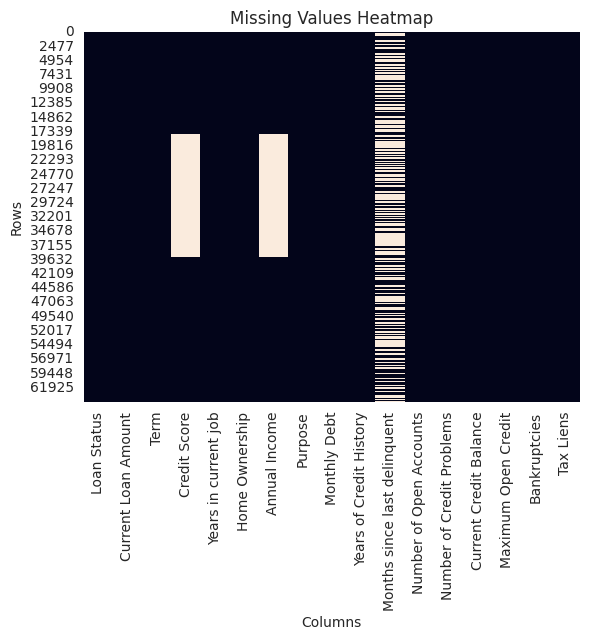

In [126]:
cols = loan_data.columns

# Create the heatmap
sns.heatmap(loan_data[cols].isnull(),cbar=False)

# Add axis labels
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Missing Values Heatmap'),
# Show the plot
plt.show()

## Method 3: Missinggo


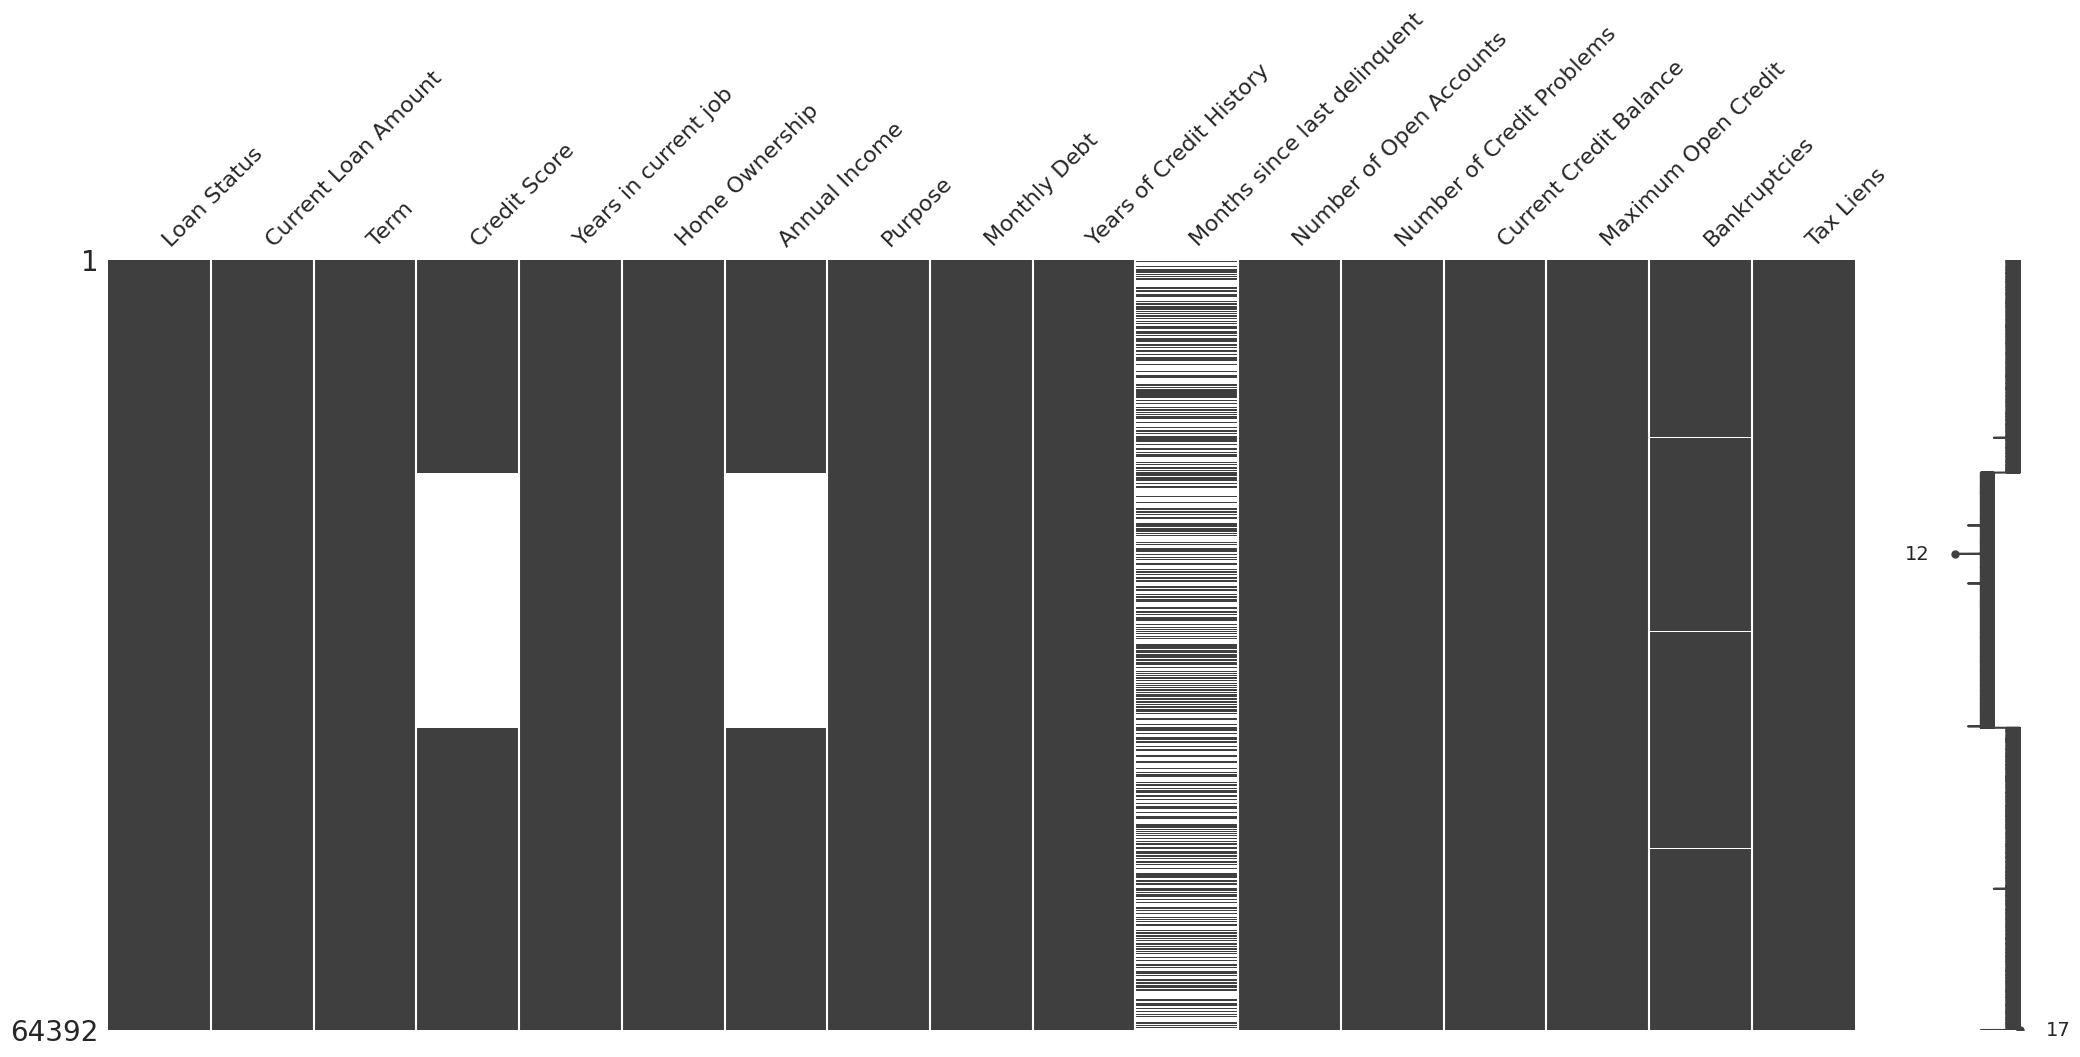

In [127]:
import missingno as msno
msno.matrix(loan_data);

/usr/local/lib/python3.10/dist-packages/missingno/missingno.py:271: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels([int(n * len(df)) for n in ax1.get_yticks()], fontsize=fontsize)


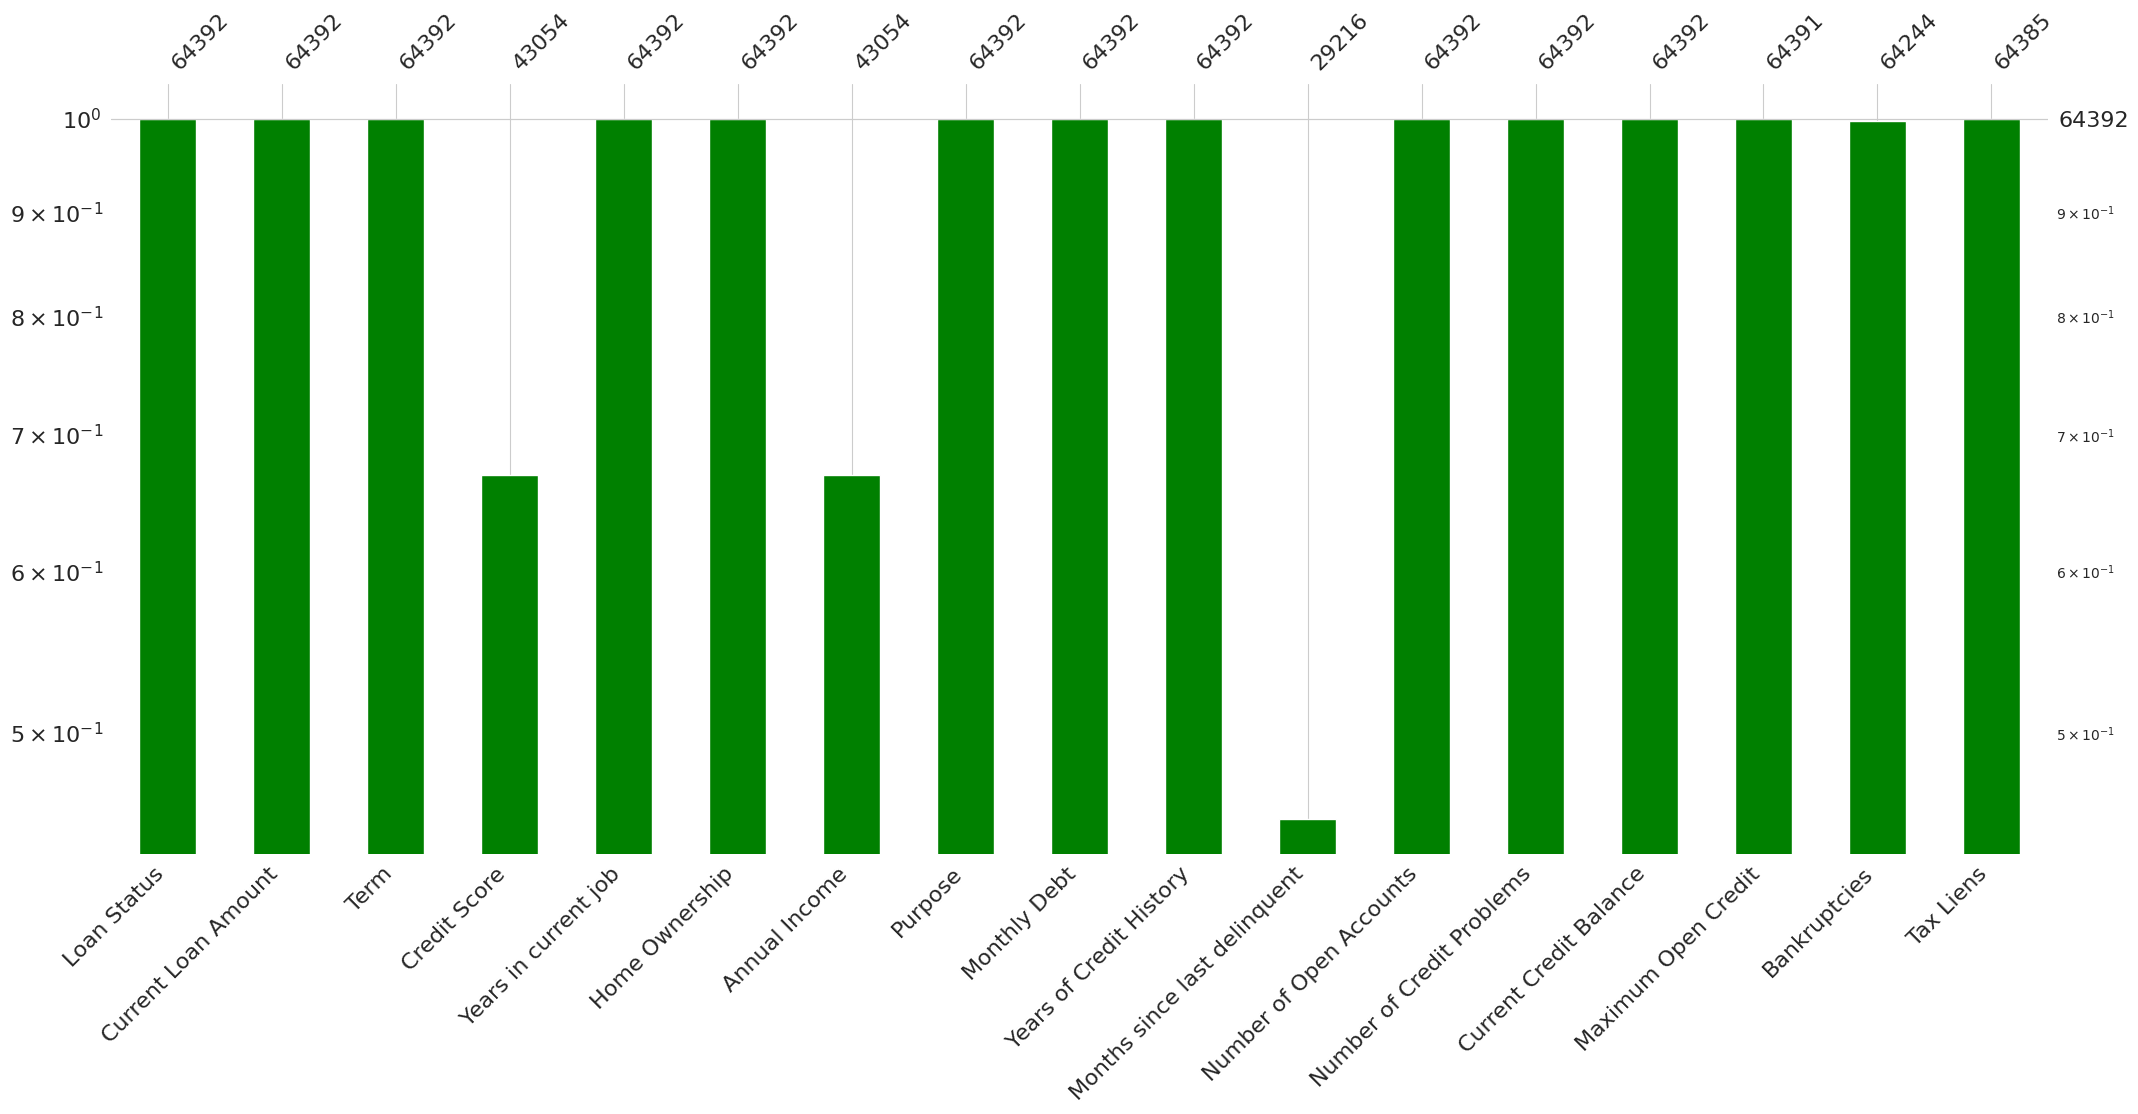

In [128]:
msno.bar(df, log = True, color = 'g');

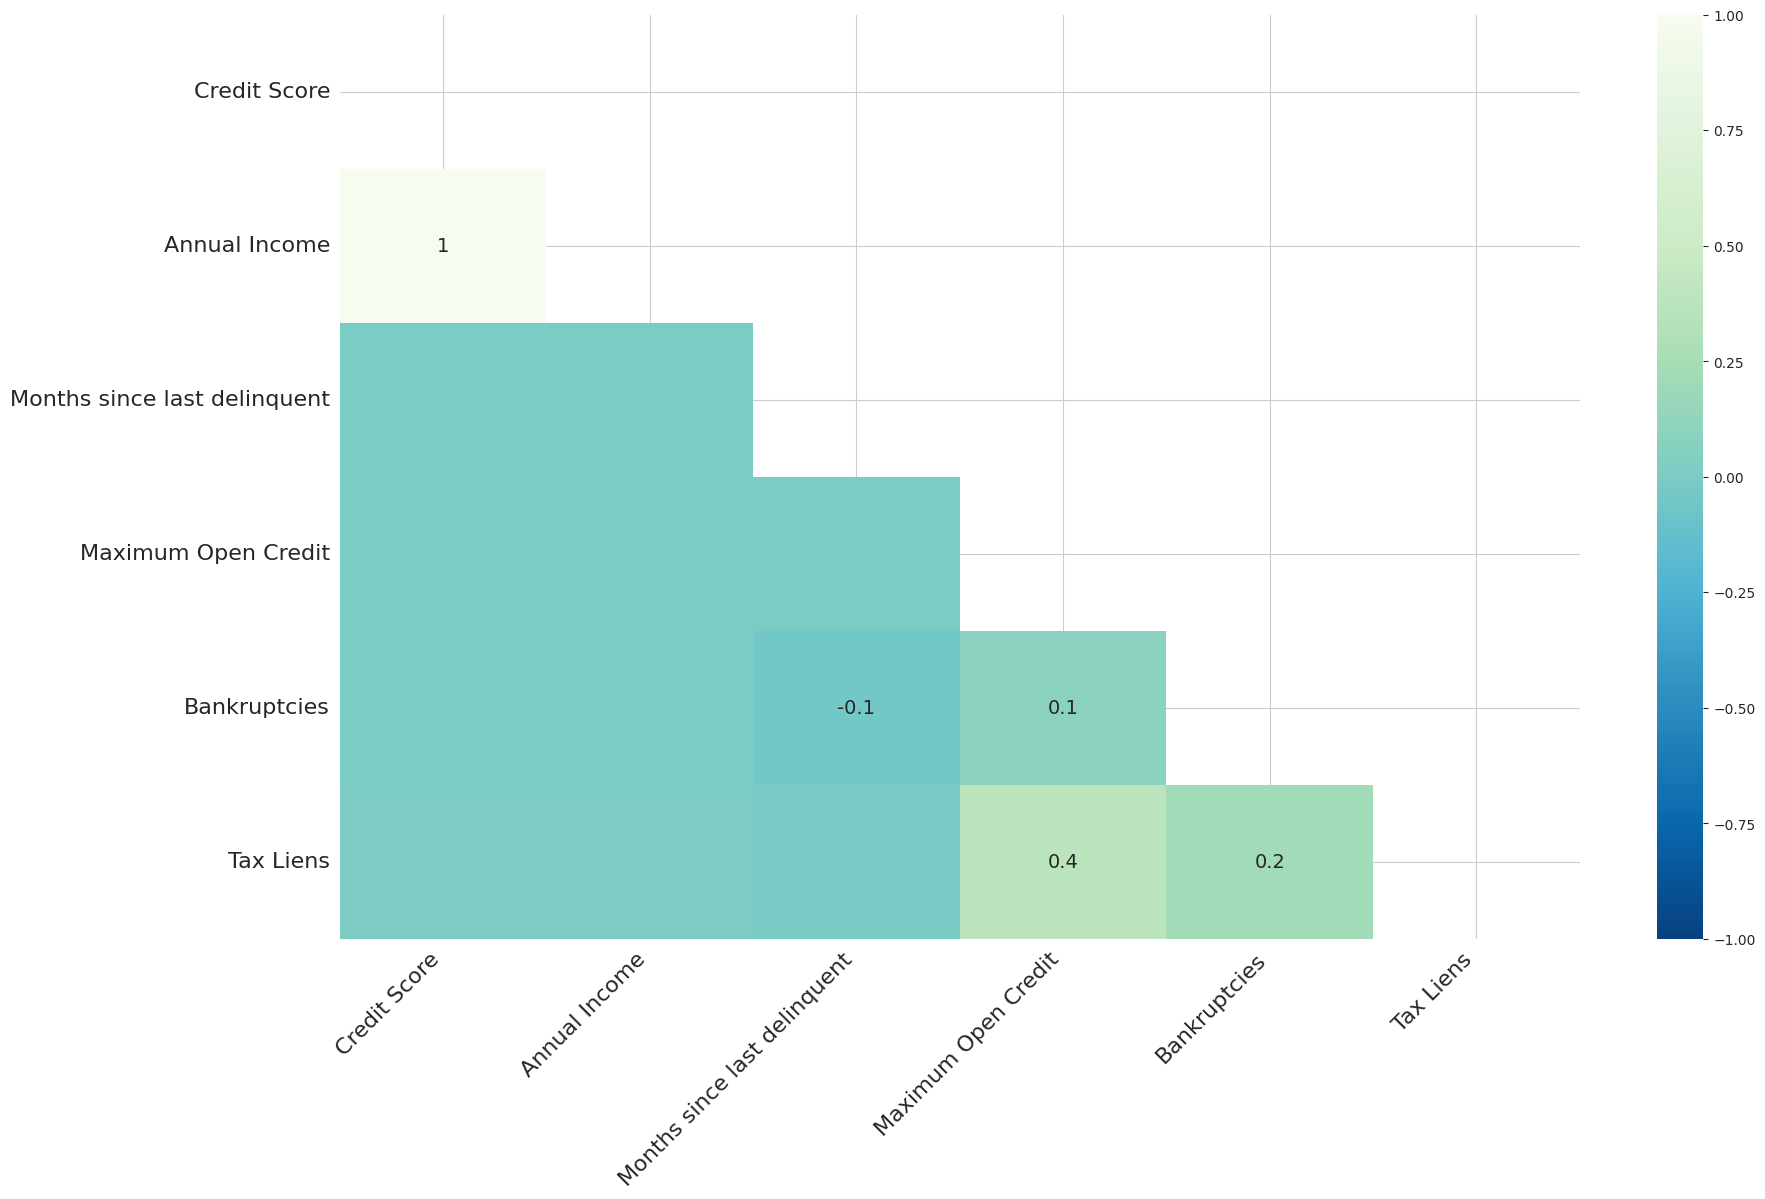

In [129]:
msno.heatmap(df,  cmap='GnBu_r');

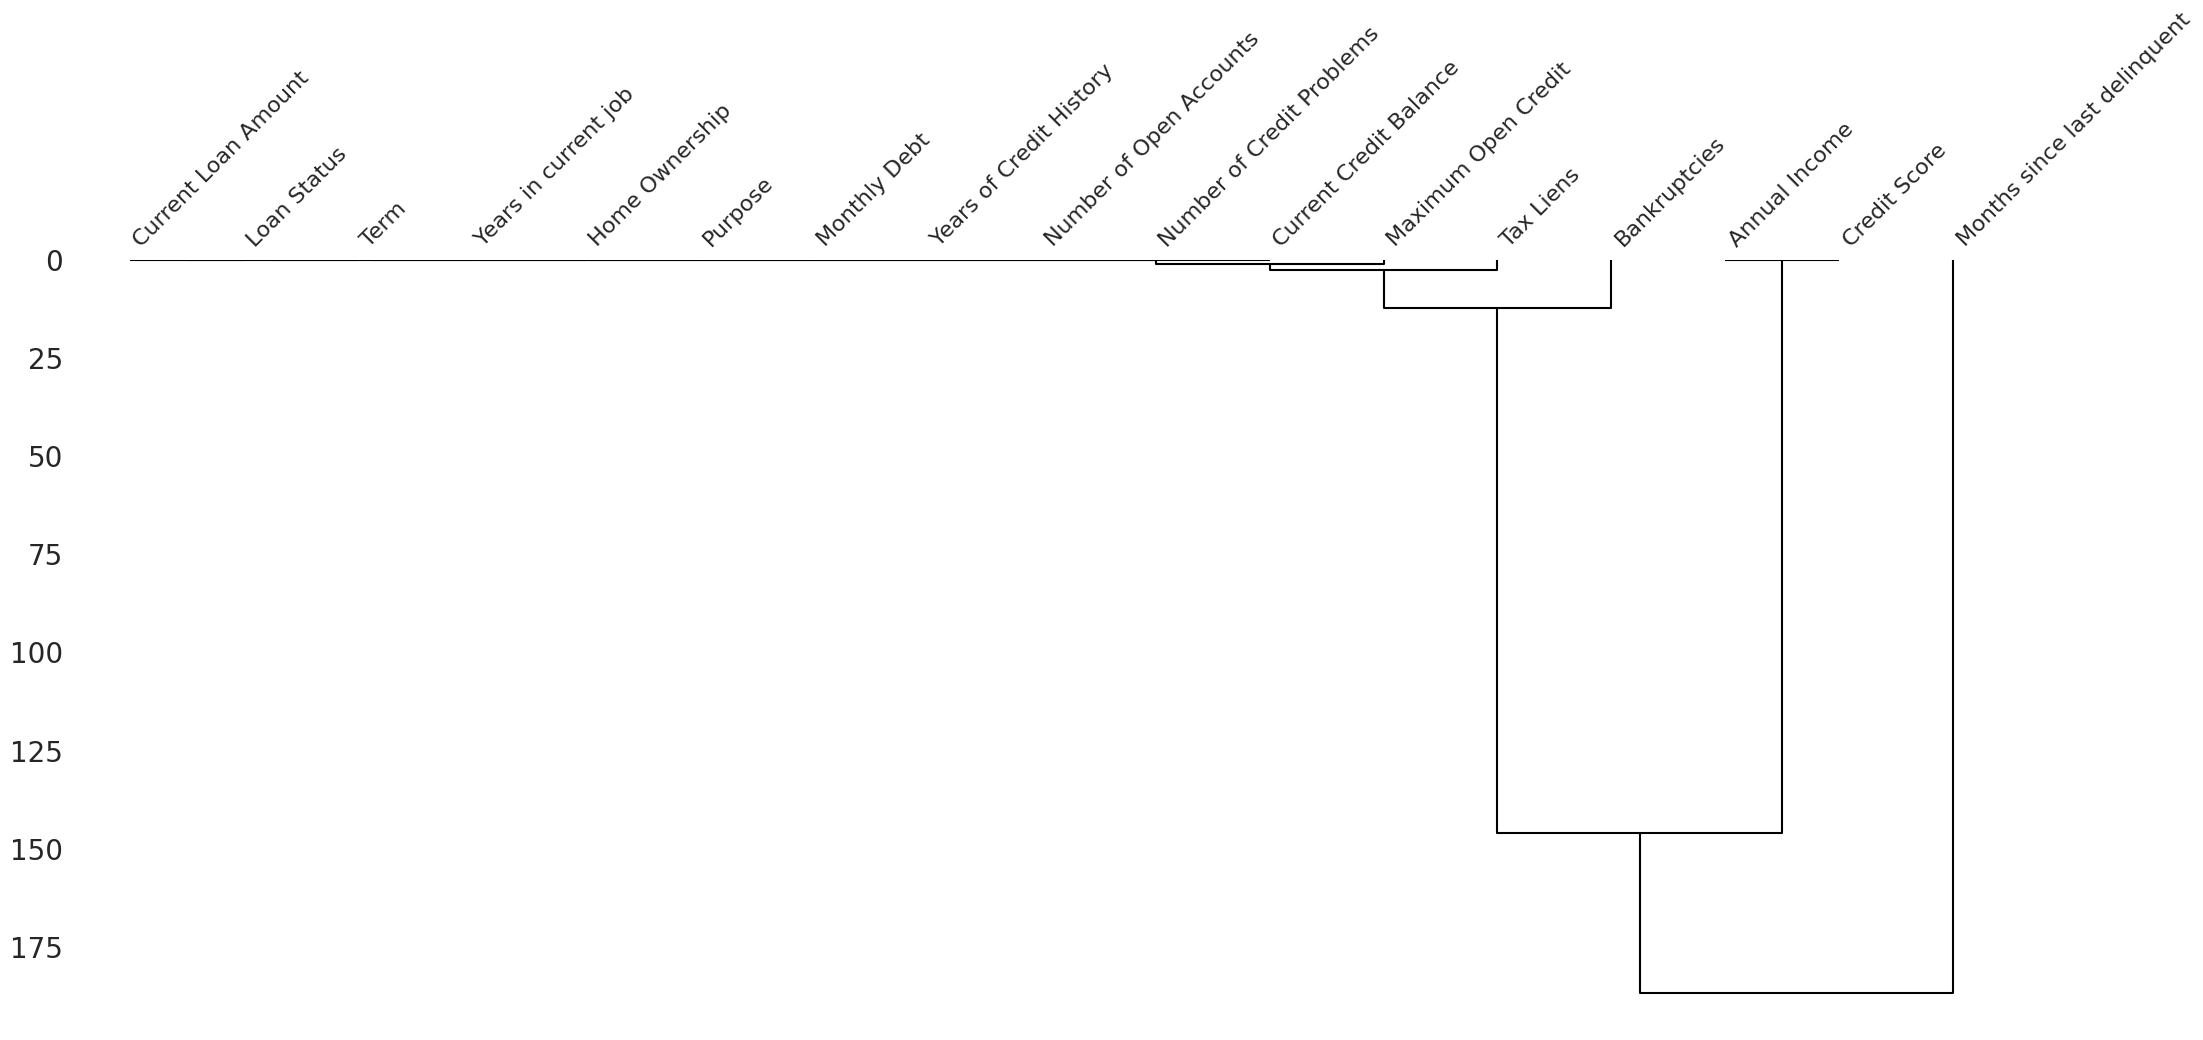

In [130]:
ax = msno.dendrogram(df)

## Method 4: percentage of the missing values


In [131]:
for col in loan_data.columns:
    prct = np.mean(loan_data[col].isnull())
    print('{}:{}%'.format(col, round(prct*100)))

Loan Status:0%
Current Loan Amount:0%
Term:0%
Credit Score:33%
Years in current job:0%
Home Ownership:0%
Annual Income:33%
Purpose:0%
Monthly Debt:0%
Years of Credit History:0%
Months since last delinquent:55%
Number of Open Accounts:0%
Number of Credit Problems:0%
Current Credit Balance:0%
Maximum Open Credit:0%
Bankruptcies:0%
Tax Liens:0%


## Box Plot
To check for outliers in missing numerical data

<Axes: xlabel='Annual Income'>

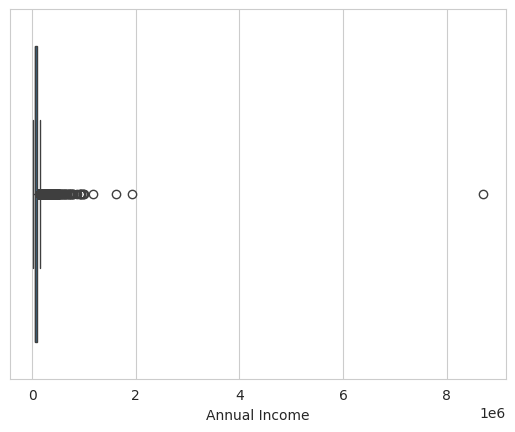

In [133]:
sns.boxplot(x=df['Annual Income'])

# Handle Null Values

## Ommision

- Drop Rows
- Drop Columns

The important thing to notice here is that removing rows or columns in this case reduces the dataset way too much to be useful.

this can lead to biased results of your machine learning model.


In [135]:
# Drop rows with missing values
dropNArows = loan_data.dropna(axis=0)

# Print percentage of rows remaining
print(dropNArows.shape[0]/loan_data.shape[0] * 100)

30.11864827928935


In [136]:
# Drop columns with missing values
dropNAcols = loan_data.dropna(axis=1)

# Print percentage of columns remaining
print(dropNAcols.shape[1]/loan_data.shape[1] * 100)

64.70588235294117


## Imputation Techniques

- Fill with 0
- Fill with missing values
- Fill with median
- Fill with mean
- Fill with most frequent value - mode
- Iterative Imputation

### Filling missing values


In [138]:
# Fill missing values with zero
loan_data_filled = loan_data.fillna(0)

# Examine 'Credit Score' before
print(loan_data['Credit Score'].describe())

# Examine 'Credit Score' after
print(loan_data_filled['Credit Score'].describe())

count    43054.000000
mean       721.546175
std         27.423425
min        585.000000
25%        710.000000
50%        730.000000
75%        741.000000
max        751.000000
Name: Credit Score, dtype: float64
count    64392.000000
mean       482.442679
std        340.379719
min          0.000000
25%          0.000000
50%        710.000000
75%        737.000000
max        751.000000
Name: Credit Score, dtype: float64


#### Numerical Values

In [141]:
#using python
loan_data['Annual Income'].fillna(loan_data['Annual Income'].mean(), inplace = True)
loan_data.isnull().sum()

Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    21338
Years in current job                0
Home Ownership                      0
Annual Income                       0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    35176
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 1
Bankruptcies                      148
Tax Liens                           7
dtype: int64

In [144]:
# Import imputer module
from sklearn.impute import SimpleImputer

# Subset numeric features: numeric_cols
numeric_cols = loan_data.select_dtypes(include=[np.number])
# Impute with mean using sklearn
imp_mean = SimpleImputer(strategy='mean')#can be median or most_frequent
loans_imp_mean = imp_mean.fit_transform(numeric_cols)

# Convert returned array to DataFrame
loans_imp_meanDF = pd.DataFrame(loans_imp_mean,  columns=numeric_cols.columns)
# Check the DataFrame's info
print(loans_imp_meanDF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64392 entries, 0 to 64391
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Current Loan Amount           64392 non-null  float64
 1   Credit Score                  64392 non-null  float64
 2   Years in current job          64392 non-null  float64
 3   Annual Income                 64392 non-null  float64
 4   Monthly Debt                  64392 non-null  float64
 5   Years of Credit History       64392 non-null  float64
 6   Months since last delinquent  64392 non-null  float64
 7   Number of Open Accounts       64392 non-null  float64
 8   Number of Credit Problems     64392 non-null  float64
 9   Current Credit Balance        64392 non-null  float64
 10  Maximum Open Credit           64392 non-null  float64
 11  Bankruptcies                  64392 non-null  float64
 12  Tax Liens                     64392 non-null  float64
dtypes

In [145]:
loans_imp_meanDF.describe()

,Current Loan Amount,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,6.439200e+04,64392.000000,64392.000000,6.439200e+04,64392.000000,64392.000000,64392.000000,64392.000000,64392.000000,6.439200e+04,6.439200e+04,64392.000000,64392.000000
mean,1.979316e+07,721.546175,5.723855,7.212038e+04,961.911943,18.303094,35.023343,11.103569,0.161231,1.540938e+04,3.383820e+04,0.113489,0.027879
std,3.983029e+07,22.423883,3.593951,5.175922e+04,632.588685,7.044663,14.814954,4.965484,0.476010,1.948852e+04,3.022763e+05,0.343905,0.258206
min,4.910000e+02,585.000000,0.500000,4.815000e+03,0.000000,3.600000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.884750e+03,721.546175,2.000000,5.244700e+04,531.857500,13.500000,35.023343,8.000000,0.000000,5.912000e+03,1.269675e+04,0.000000,0.000000
50%,1.508300e+04,721.546175,6.000000,7.212038e+04,843.395000,17.000000,35.023343,10.000000,0.000000,1.099400e+04,2.172550e+04,0.000000,0.000000
75%,2.946050e+04,737.000000,10.000000,7.281100e+04,1251.257500,21.800000,35.023343,14.000000,0.000000,1.926350e+04,3.629225e+04,0.000000,0.000000
max,1.000000e+08,751.000000,10.000000,8.713547e+06,12055.680000,65.000000,152.000000,76.000000,15.000000,1.730472e+06,6.998809e+07,7.000000,15.000000


In [149]:
loan_data=df.copy()
loan_data.describe()

,Current Loan Amount,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,6.439200e+04,43054.000000,64392.000000,4.305400e+04,64392.000000,64392.000000,29216.000000,64392.000000,64392.000000,6.439200e+04,6.439100e+04,64244.000000,64385.000000
mean,1.979316e+07,721.546175,5.723855,7.212038e+04,961.911943,18.303094,35.023343,11.103569,0.161231,1.540938e+04,3.383820e+04,0.113489,0.027879
std,3.983029e+07,27.423425,3.593951,6.329925e+04,632.588685,7.044663,21.994289,4.965484,0.476010,1.948852e+04,3.022786e+05,0.344301,0.258220
min,4.910000e+02,585.000000,0.500000,4.815000e+03,0.000000,3.600000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.884750e+03,710.000000,2.000000,4.441575e+04,531.857500,13.500000,16.000000,8.000000,0.000000,5.912000e+03,1.269650e+04,0.000000,0.000000
50%,1.508300e+04,730.000000,6.000000,6.139650e+04,843.395000,17.000000,32.000000,10.000000,0.000000,1.099400e+04,2.172500e+04,0.000000,0.000000
75%,2.946050e+04,741.000000,10.000000,8.660625e+04,1251.257500,21.800000,51.000000,14.000000,0.000000,1.926350e+04,3.629250e+04,0.000000,0.000000
max,1.000000e+08,751.000000,10.000000,8.713547e+06,12055.680000,65.000000,152.000000,76.000000,15.000000,1.730472e+06,6.998809e+07,7.000000,15.000000


In [155]:
train=pd.read_csv('madfhantr.csv')

In [156]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [157]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [158]:
train['Loan_Amount_Term'].value_counts()


Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [159]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [160]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)